In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
prompt_dirs = [
    "spatial-physical",
    "physical-temporal",
    "spatial-temporal",
    "spatial-temporal-physical",
]

In [23]:
llms = ['llama3:8b', 'ChatGPT4o', 'ChatGPT3.5']

In [28]:
results_per_llm = {llm: {prompt: [] for prompt in prompt_dirs}
                   for llm in llms}
for dir in prompt_dirs:
    prompts_json_filename = f"../{dir}/{dir}.json"
    with open(prompts_json_filename, "r") as prompts_file:
        prompts = json.load(prompts_file)
        for prompt in prompts:
            human = prompt["human_annotation"]
            for key in prompt["responses"].keys():
                correct = False
                try:
                    response = prompt["responses"][key]
                    if int(response) == human:
                        correct = True
                except ValueError as e:
                    pass
                results_per_llm[key][f"{dir}"].append(correct)

In [30]:
sum(results_per_llm['ChatGPT4o']['spatial-physical'])

10

In [31]:
len(results_per_llm['ChatGPT4o']['spatial-physical'])

14

In [49]:
def plot_llm(llm_name: str):
    percentages = {key: (round(sum(values) / len(values), 2) * 100)
                             for key, values in results_per_llm[llm_name].items()}
    keys = list(percentages.keys())
    values = list(percentages.values())

    plt.figure()
    bars = plt.bar(keys, values)
    plt.ylabel('Percentage Correct (%)')
    plt.title(f'{llm_name} accuracy for each commonsense category')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height- 10,
                 f'{height:.0f}', ha='center', va='center')
    plt.show()

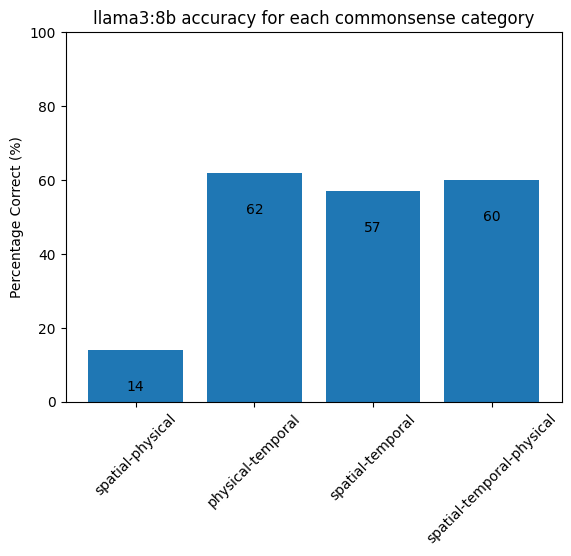

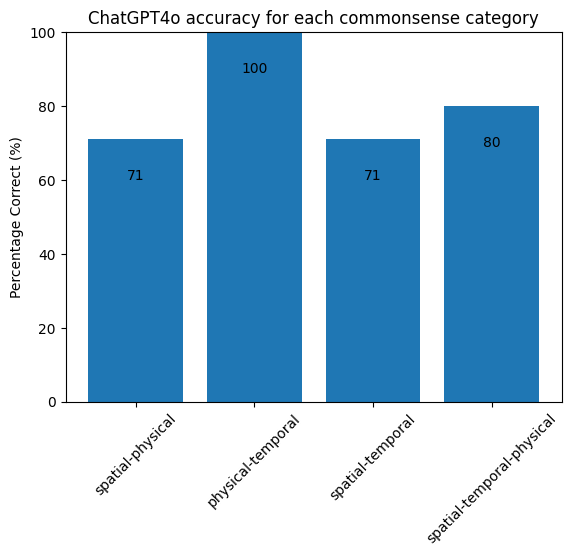

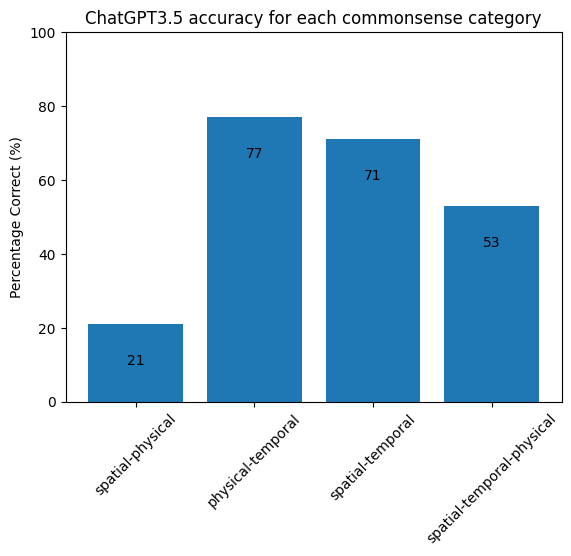

In [50]:
for llm in llms:
    plot_llm(llm)